## Clustering

### k-means clustering

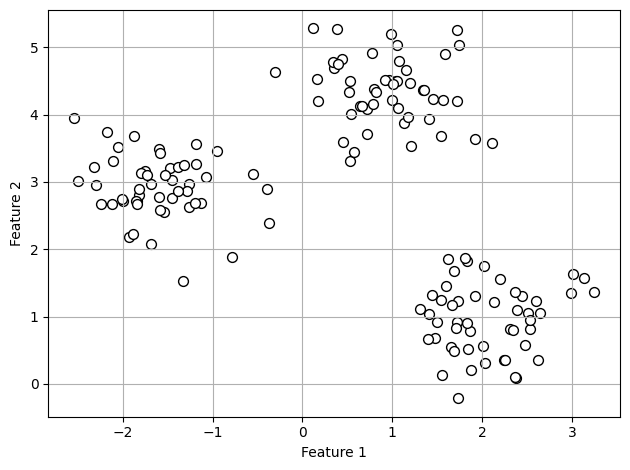

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate a 2D dataset with 3 clusters
X, y = make_blobs(
    n_samples=150,       # total samples
    n_features=2,        # number of features (dimensions)
    centers=3,           # number of clusters
    cluster_std=0.5,     # standard deviation of clusters
    shuffle=True,        # shuffle the data
    random_state=0       # for reproducibility
)

# Plot the dataset
plt.scatter(
    X[:, 0], X[:, 1],   # first and second feature
    c='white',          # marker color
    marker='o',         # marker type
    edgecolor='black',  # marker edge color
    s=50                # marker size
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show() # dataset created consists of 150 randomly generated points that are roughly grouped in 3 regions

In [2]:
# Using kmeans class from scikit-learn
from sklearn.cluster import KMeans

# Initialize KMeans clustering
km = KMeans(
    n_clusters=3,      # number of clusters
    init='random',      # initial cluster centers randomly chosen
    n_init=10,          # number of times the algorithm will be run with different centroid seeds
    max_iter=300,       # maximum number of iterations per run
    tol=1e-04,          # relative tolerance with regards to inertia to declare convergence
    random_state=0      # seed for reproducibility
)

# Fit KMeans to data and get cluster labels
y_km = km.fit_predict(X)


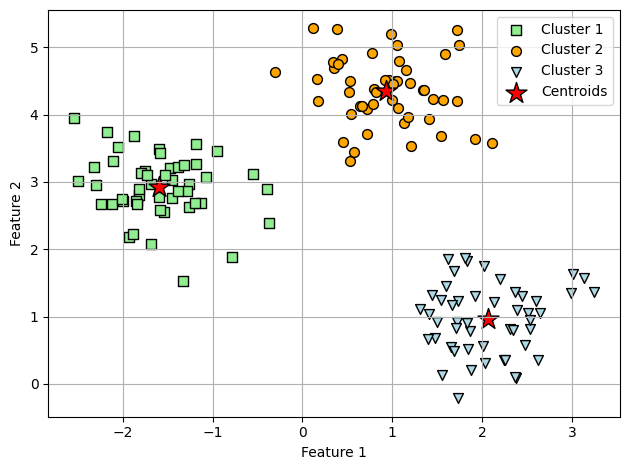

In [3]:
# Let's visualize clusters that k-means identified
import matplotlib.pyplot as plt

# Plot each cluster with a distinct color and marker
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')

plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')

# Plot centroids of clusters
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()


### Using elbow method to find optimal number of clusters

In [5]:
# within-cluster SSE is already accessible via inertia_ attribute after fitting KMeans model
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


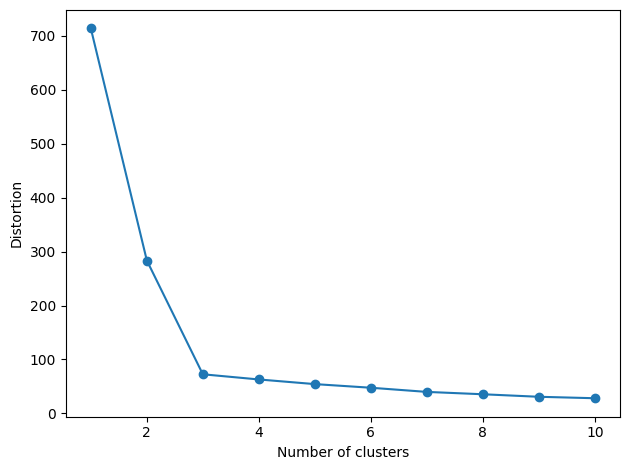

In [ ]:
# Based on within-cluster SSE, we can use graphical tool known as elbow method to estimate optimal number of clusters k, if k increases, distortion will decrease, and idea is to identify the value of k where distortion beings to increase most rapidly
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Compute distortions for k = 1 to 10 clusters to use the elbow method
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',  # smart centroid initialization
                n_init=10,         # run k-means 10 times to choose best inertia
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)  # inertia_: sum of squared distances to closest cluster center

# Plot the distortions to visualize the "elbow"
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show() # in this elbow is located at k=3, which suggests optimal number of clusters


### silhouette plots

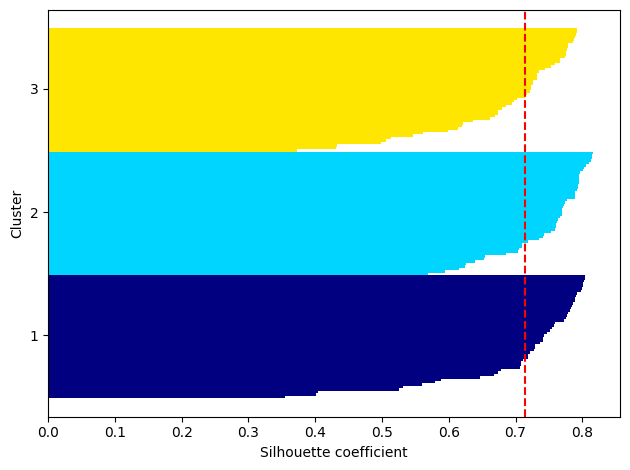

In [ ]:
# silhoueete coefficient is available as silhouette samples from metric module
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

# Fit KMeans with 3 clusters
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

# Number of clusters
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# Compute silhouette values for each sample
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

# Initialize variables for plotting
y_ax_lower, y_ax_upper = 0, 0
yticks = []

# Plot silhouette bars for each cluster
for i, c in enumerate(cluster_labels):
    # Silhouette values for cluster c
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    
    # Horizontal bar plot
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    
    # Center of y-axis tick for the cluster
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# Average silhouette coefficient line
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

# Set y-ticks and labels
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show() # silhouette plot shows coefficients are not close to 0 and approximately uniform across clusters, this indicates good clustering


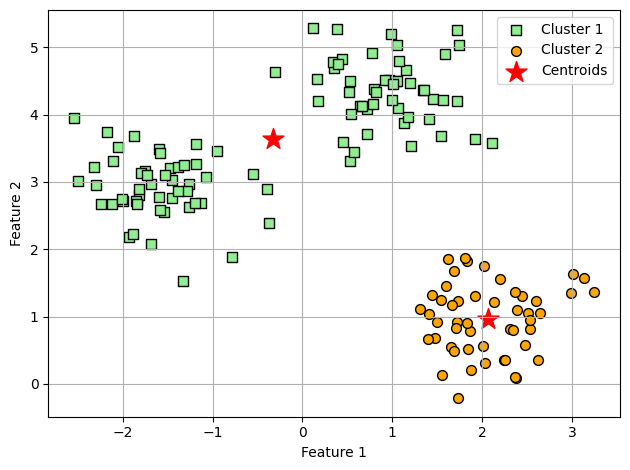

In [8]:
# For an example of bad clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fit KMeans with 2 clusters
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

# Plot the clusters
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            s=50, c='lightgreen', edgecolor='black',
            marker='s', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            s=50, c='orange', edgecolor='black',
            marker='o', label='Cluster 2')

# Plot cluster centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')

# Labels, legend, and layout
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


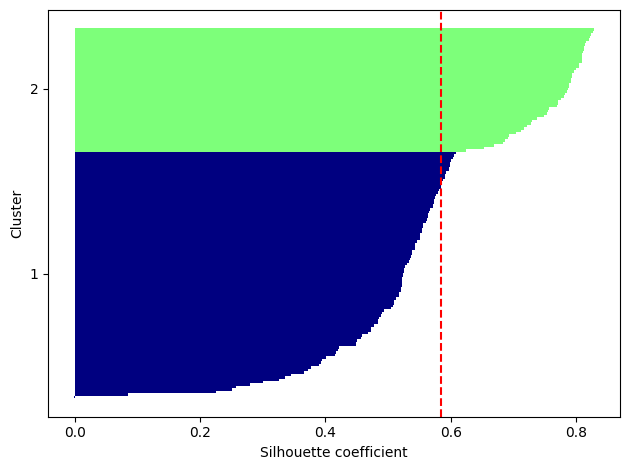

In [ ]:
# silhouette plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import silhouette_samples

# Get unique cluster labels and number of clusters
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# Compute silhouette values for each sample
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

# Initialize vertical bounds for the silhouette plot
y_ax_lower, y_ax_upper = 0, 0
yticks = []

# Plot silhouette values for each cluster
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]  # values for this cluster
    c_silhouette_vals.sort()  # sort within cluster
    y_ax_upper += len(c_silhouette_vals)
    
    # Assign color to this cluster
    color = cm.jet(float(i) / n_clusters)
    
    # Draw horizontal bars for silhouette values
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    
    # Compute tick position for cluster label
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# Average silhouette value across all samples
silhouette_avg = np.mean(silhouette_vals)

# Draw vertical line for average silhouette
plt.axvline(silhouette_avg, color="red", linestyle="--")

# Set y-ticks and labels
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()
# the silhouettes now have visibly different lengths and widths